# Tutorial 1: Social Media and Natural Hazards

Natural processes such as thunderstorms, wildfires, earthquakes, and floods may lead to significant losses in terms of property and human life. Gathering information about the damages in time is crucial and may help in mitigating the loss, and faster recovery ([Said et al, 2019](https://link.springer.com/article/10.1007/s11042-019-07942-1)).

Social media are one of the most important sources of not only real-time information but records since their existence. They have been crawled over the years to collect and analyze disaster-related multimedia content ([Said et al, 2019](https://link.springer.com/article/10.1007/s11042-019-07942-1)). There are different applications where we can use social media data to analyze natural disasters.

Through this tutorial, we will learn how we can use Twitter data to analyze natural hazards. We will do so by applying the concept of natural language processing.



This tutorial is heavily based upon the work of [others](https://www.jcchouinard.com/tweepy-basic-functions/).


### Important before we start
---
Make sure that you save this file before you continue, else you will lose everything. To do so, go to **Bestand/File** and click on **Een kopie opslaan in Drive/Save a Copy on Drive**!

Now, rename the file into Week6_Tutorial1.ipynb. You can do so by clicking on the name in the top of this screen.

By using this notebook and associated files, you agree to the Twitter Developer Agreement and Policy, which can be found [here](https://developer.twitter.com/en/developer-terms/agreement-and-policy).

## Learning Objectives 
<hr>

- Learn about the importance and application of social media data
- Access social media (Twitter) through the API
- Retrieve Twitter data
- Filter and clean the retrieved data
- Visualize the data in different plots such as `bar`, `scatter`, and `spatial`.

<h2>Tutorial outline<span class="tocSkip"></span></h2>
<hr>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Introduction" data-toc-modified-id="1.-Introduction-1">1. Introduction to the packages</a></span></li><li><span><a href="#2.-Basic-Python-Data-Types" data-toc-modified-id="2.-Basic-Python-Data-Types-2">2. Social Media </a></span></li><li><span><a href="#3.-Lists-and-Tuples" data-toc-modified-id="3.-Lists-and-Tuples-3">3. Natural Language Processing (NLP)</a></span></li><li><span><a href="#4.-String-Methods" data-toc-modified-id="4.-String-Methods-4">4. Data retrieval and post-processing </a></span></li><li><span><a href="#5.-Dictionaries" data-toc-modified-id="5.-Dictionaries-5">5. Applications: detecting natural hazards</a></span></li>

## 1.Introducing the packages
<hr>

Within this tutorial, we are going to make use of the following packages: 

[**GeoPandas**](https://geopandas.org/) is a Python packagee that extends the datatypes used by pandas to allow spatial operations on geometric types.

[**JSON**](https://docs.python.org/3/library/json.html) is a lightweight data interchange format inspired by JavaScript object literal syntax.

[**Matplotlib**](https://matplotlib.org/) is a comprehensive Python package for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.

[**NumPy**](https://numpy.org/doc/stable/) is a Python library that provides a multidimensional array object, various derived objects, and an assortment of routines for fast operations on arrays.

[**Pandas**](https://pandas.pydata.org/docs/) is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

[**tweepy**](https://www.tweepy.org/) is an easy-to-use Python library for accessing the Twitter API.


*We will first need to install these packages in the cell below. Uncomment them to make sure we can pip install them*

In [ ]:
#!pip install geopandas
#!pip install matplotlib
#!pip install tweepy

As you may or may not have seen while installing, there was a warning that we need to restart our runtime. To do so, click on **Runtime** in the topbar menu and click on **Runtime opnieuw starten**/**Restart runtime**.

Now we will import these packages in the cell below:

In [1]:
import numpy as np
from matplotlib import pylab as plt
import pandas as pd
from datetime import datetime, date
import geopandas as gpd
import tweepy
import json

from mpl_toolkits.axes_grid1 import make_axes_locatable 


%matplotlib inline

## 2. Social Media
<hr>

Social media are interactive technologies that facilitate the creation and sharing of information, ideas, interests, and other forms of expression through virtual communities and networks.

Therefore, social media can be used as a source of real-time information for natural disaster detection. Moreover, the database can be used to post-analyze natural disasters for a better estimation of the extent and the damages the hazard had caused. 

Some of the most popular social media websites, with more than 100 million registered users, include Facebook (and its associated Facebook Messenger), TikTok, WeChat, ShareChat, Instagram, QZone, Weibo, Twitter, Tumblr, Baidu Tieba, and LinkedIn.

Twitter has been proven to be a useful data source for many research communities (Ekta et al, 2017, Graff et al, 2022), from social science to computer science, it can advance research objectives on topics as diverse as the global conversations happening on Twitter. It is one of the most popular online social networking sites with around 450 million monthly [active users](https://www.demandsage.com/twitter-statistics/) as of 2022. An important characteristic of Twitter is its real-time nature.

Twitter offers tools and programs that help people when emergencies and natural disasters strike, allowing channels of communication and humanitarian response, among other [areas of focus](https://about.twitter.com/en/who-we-are/twitter-for-good) such as environmental conservation and sustainability. 

The [Twitter API](https://developer.twitter.com/en) enables programmatic access to Twitter in unique and advanced ways. Twitter's Developer Platform enables you to harness the power of Twitter's open, global, real-time, and historical platform within your own applications. The platform provides tools, resources, data, and API products for you to integrate, and expand Twitter's impact through research, solutions, and more.

To be able to use Twitter's Developer Platform we need first a general account, and second to ask for an upgrade to a developer account. 

Here we show you how to gain access:

1.	How to sign up on Twitter

<img src="https://github.com/ElcoK/BigData_AED/blob/main/_static/images/twitter_registration.gif?raw=1" class="bg-primary mb-1">
<br>



2.	How to get access to [Twitter API](https://developer.twitter.com/en/docs/twitter-api/getting-started/getting-access-to-the-twitter-api)

<img src="https://github.com/ElcoK/BigData_AED/blob/main/_static/images/twtter_api.gif?raw=1" class="bg-primary mb-1">
<br>

Do not forget to copy and save in a safe place your `API key` and `API key Secret`, we will need them later.

<img src="https://github.com/ElcoK/BigData_AED/blob/main/_static/images/API_Keys.PNG?raw=1" class="bg-primary mb-1">
<br>

3.   How to get the tokens from the [Dashboard](https://developer.twitter.com/en/portal/dashboard)

<img src="https://github.com/ElcoK/BigData_AED/blob/main/_static/images/twitter_token.gif?raw=1" class="bg-primary mb-1">
<br>

Do not forget to copy and save in a safe place your `Access Token` and `Access Token Secret`, we will need them later.

<img src="https://github.com/ElcoK/BigData_AED/blob/main/_static/images/Token.PNG?raw=1" class="bg-primary mb-1">
<br>

4.	How to upgrade to an elevated access from the [Dashboard](https://developer.twitter.com/en/portal/dashboard)

`Please note that for this you will need to verify your account, adding also your phone number`


<img src="https://github.com/ElcoK/BigData_AED/blob/main/_static/images/twitter_elevated.gif?raw=1" class="bg-primary mb-1">
<br>


Note that you can also apply for premium access. For this tutorial, it is not necessary, but if you are interested you can have a look at the [Developer Platform](https://developer.twitter.com/en/docs/twitter-api/premium/search-api/api-reference/premium-search#SearchRequests) to learn about it.

Now we are ready to start exploring `Tweepy`!

#### Authenticate with Tweepy

In order to gain access to Twitter information we first need to authenticate to the Twitter API.

Replace **`Your_info`** with your Twitter credentials that you have obtained in the previous section. 

<span style="color:red">Maria's API key is used to check if colab works, please do not include them in the final version</span>

In [2]:
# API keyws that yous saved earlier
# api_key = "Your_info"
# api_secrets = "Your_info"
# access_token = "Your_info"
# access_secret = "Your_info"

## Maria's API keys 
api_key = "SbjfdyjQgzVKPxfzZEQJtqn5Q"
api_secrets = "hb1iOFl2hupClPzXn2cI632efGgg4epyA4FDWFZW0eIsyoxtVh"
access_token = "3996035119-3G6XL2EuVYWShNbi6Lkd516Jb1jb20wpSJDxRPQ"
access_secret = "ZrbKPyzJdCxHhBnGBLBHrN38TKBFlp3jNpR1o3iYSJqeV"

Now we're going to use `tweepy` to authenticate to Twitter.
 
The code includes a verification step to make sure we are successfully authenticated.

In [3]:
# Authenticate to Twitter
auth = tweepy.OAuthHandler(api_key,api_secrets)
auth.set_access_token(access_token,access_secret)
 
api = tweepy.API(auth)
 
try:
    api.verify_credentials()
    print('Successful Authentication')
except:
    print('Failed authentication')

Successful Authentication


#### Getting User Information

Now that we have successfully authenticated we can make Twitter API requests such as getting the information of a user, for example, we can show the followers of a user or list the user's latest post. 

So let's try it!

The first step is to call the API to get the user that you want to get information from.

The get_user() method can take a Twitter screen_name or the user_id as a parameter.

In [4]:
user = api.get_user(screen_name='VU_IVM')

We can look at the data that you can extract for a given user using:

In [5]:
user._json

{'id': 928934147057508352,
 'id_str': '928934147057508352',
 'name': 'IVM - VU Amsterdam',
 'screen_name': 'VU_IVM',
 'location': 'Amsterdam, The Netherlands',
 'profile_location': {'id': '99cdab25eddd6bce',
  'url': 'https://api.twitter.com/1.1/geo/id/99cdab25eddd6bce.json',
  'place_type': 'unknown',
  'name': 'Amsterdam, The Netherlands',
  'full_name': 'Amsterdam, The Netherlands',
  'country_code': '',
  'country': '',
  'contained_within': [],
  'bounding_box': None,
  'attributes': {}},
 'description': 'Leading in Sustainability Science: Institute for Environmental Studies in @VU_Science at @VUamsterdam.',
 'url': 'https://t.co/lST7ZMEt4r',
 'entities': {'url': {'urls': [{'url': 'https://t.co/lST7ZMEt4r',
     'expanded_url': 'http://www.ivm.vu.nl',
     'display_url': 'ivm.vu.nl',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 1854,
 'friends_count': 552,
 'listed_count': 17,
 'created_at': 'Fri Nov 10 10:35:34 +0000 2017',


We can also look at a specific field of the data (e.g. name, location, etc.). 

Here are some examples:

In [6]:
print(f"user.name: {user.name}")
print(f"user.screen_name: {user.screen_name}")
print(f"user.location: {user.location}")
print(f"user.description: {user.description}")
print(f"user.followers_count: {user.followers_count}")
print(f"user.listed_count: {user.listed_count}")
print(f"user.statuses_count: {user.statuses_count}")
print(f"user urls: {user.entities['url']['urls'][0]['expanded_url']}")

user.name: IVM - VU Amsterdam
user.screen_name: VU_IVM
user.location: Amsterdam, The Netherlands
user.description: Leading in Sustainability Science: Institute for Environmental Studies in @VU_Science at @VUamsterdam.
user.followers_count: 1854
user.listed_count: 17
user.statuses_count: 1550
user urls: http://www.ivm.vu.nl


Now let's see the latest 5 tweets the IVM has posted.

The user_timeline() method uses the user_id as a parameter, and we can indicate how many tweets we want using the count parameter.

In [7]:
user_id = user.id_str
Latest_tweets = api.user_timeline(user_id=user_id, count=5)

Have you tried to see what the data looks like? 

You can do it by Uncomment the following line:

In [6]:
# Latest_tweets[0]

As you can see, data contains many parameters and its format is not that convenient for analyzing it. 

Later we will learn how to create a DataFrame and process the data. For now, some important parameters we can extract from the tweet data are the description, location, text, hashtags, among others.

Here are some examples:

In [8]:
print(f"username: {Latest_tweets[0].user.screen_name}")
print(f"description: {Latest_tweets[0].user.description}")
print(f"text: {Latest_tweets[0].text}")
print(f"date_time: {Latest_tweets[0].created_at}")
print(f"location: {Latest_tweets[0].user.location}")
print(f"coordinates: {Latest_tweets[0].coordinates}")
print(f"following: {Latest_tweets[0].user.friends_count}")
print(f"followers: {Latest_tweets[0].user.followers_count}")
print(f"totaltweets: {Latest_tweets[0].user.statuses_count}")
print(f"retweetcount: {Latest_tweets[0].retweet_count}")
print(f"hashtags: {Latest_tweets[0].entities['hashtags']}")


username: VU_IVM
description: Leading in Sustainability Science: Institute for Environmental Studies in @VU_Science at @VUamsterdam.
text: RT @Marleen_Ruiter: Day 1 of the @Compound_Event #Damocles workshop on the interactions between scientists and practitioners. Introductory…
date_time: 2023-01-18 09:17:01+00:00
location: Amsterdam, The Netherlands
coordinates: None
following: 552
followers: 1854
totaltweets: 1550
retweetcount: 2
hashtags: [{'text': 'Damocles', 'indices': [49, 58]}]


```{tip} 
How many followers does @VU_IVM have? 
When was the last time @VU_IVM tweeted/retweeted?

```


We've now learned how to make Twitter API requests to get some information from a specific user. We will continue exploring `tweepy` in the following sections. 

Please note that we can also make changes to our own account such as updating our profile and interacting with other users. If you're enthusiastic about it, you can find more information [here](https://www.jcchouinard.com/tweepy-basic-functions/) .

## 3. Natural Language Processing (NLP)
<hr>

As mentioned in [Lecture](https://elcok.github.io/BigData_AED/week6/lecture.html), Natural language processing (NLP) is an area of computer science and artificial intelligence concerned with the interaction between computers and humans in natural language. The ultimate goal of NLP is to help computers understand language as well as we do.
There are two ways of understanding natural language: Syntactic and Semantic analysis. Whereas Syntactic analysis (also referred to as syntax analysis or parsing) is the process of analyzing natural language with the rules of formal grammar, Semantic analysis is the process of understanding the meaning and interpretation of words, signs, and sentence structure.

There are different techniques for understanding text such as Parsing, Stemming, Text Segmentation, Named Entity Recognition, Relationship Extraction, and Sentiment Analysis (see [Lecture](https://elcok.github.io/BigData_AED/week6/lecture.html)).

We can start here by analyzing a user's tweets by simply looking into the words he/she uses the most. 

Barack Obama ([@BarackObama](https://twitter.com/BarackObama)) has the Twitter account with the most followers according to [this website](https://www.tweetbinder.com/blog/top-twitter-accounts/). So let's explore the words he uses the most. 

First, we will retrieve his last 200 tweets:

In [9]:
user = api.get_user(screen_name='BarackObama')
user_id = user.id_str

Latest_tweets = api.user_timeline(user_id=user_id, count=200)

In the previous section, we learned how to access get the text of each tweet by using .text so let's go further first with only one tweet. 

What type of data does it contain?

In [10]:
type(Latest_tweets[0].text)

str

Before analyzing @BarackObama tweets, we need to split the string text into each word to be able to count them.

The following function is ready to use, the input is the string and the output is a dictionary that contains each word and how the count for each word.

In [11]:
def word_count(str):
    counts = dict()
    words = str.split()
    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
    return counts

Let's make sure the function is working, you can play around with different sentences.

In [12]:
sentence = 'Big Data Analysis is really fun!'
print(word_count(sentence))

{'Big': 1, 'Data': 1, 'Analysis': 1, 'is': 1, 'really': 1, 'fun!': 1}


We are ready now to analyze the data.

We will first merge the texts of all the retrieved tweets, and subsequently, we will use the word_count function to count the words.

In [13]:
concat_text = ''
for i in range(len(Latest_tweets)):
    concat_text = concat_text +" "+ Latest_tweets[i].text.lower()
concat_text
words = word_count(concat_text)

Let's see how many words @BarackObama has used. 

You can also see what the data looks like by Uncomment the line.

In [14]:
print(f'{user.screen_name} has used {len(words)} different words')
# print(words)

BarackObama has used 1591 different words


```{tip} 
How many different words does @BarackObama use? 
```


We can visualize the data in a plot bar using the following lines. 

Note that a filter is added to only visualize the words that have been used more than 5 times. You can change the count_filter to explore the data.

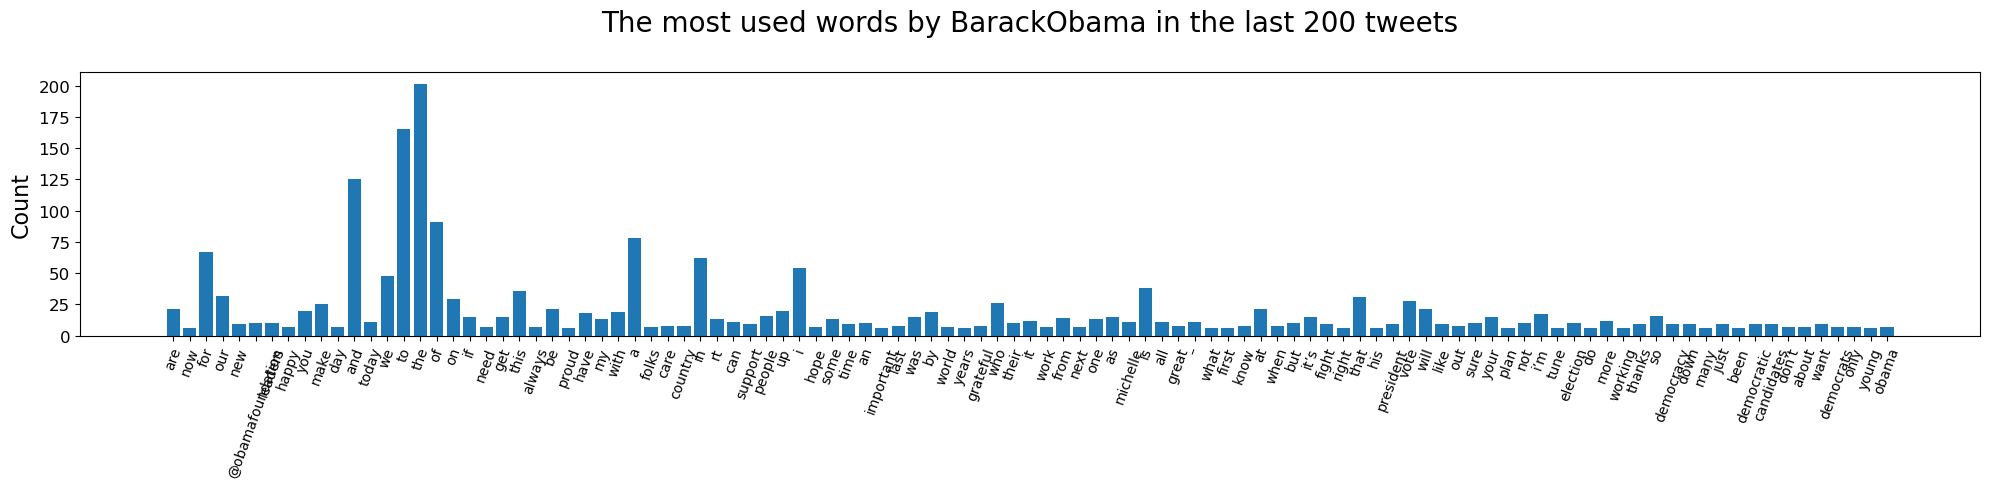

In [15]:
count_filter = 5

x = []
h = []

for i in range(len(words)):
    if list(words.items())[i][1] > count_filter:
        x.append(list(words.items())[i][0])
        h.append(list(words.items())[i][1])


plt.figure(figsize=(20, 5)) 
plt.bar(x, h)
plt.xticks(fontsize = 10, rotation = 70)
plt.yticks(fontsize = 12)
plt.title(f'The most used words by {user.screen_name} in the last 200 tweets\n', fontsize = 20) 
plt.ylabel(f'Count', fontsize=16)
plt.tight_layout()

Have you noticed that many words are prepositions? 

If we desire to determine more relevant words to know more about the context of the tweets we need to further filter the data. 

There are NLP packages that allow not only clustering analysis but also semantic analysis. So we can also evaluate whether the tweets have a positive or negative connotation. If you are interested you can have a look at [`NLTK`](https://www.nltk.org/api/nltk.tag.api.html).

Here we will apply our own word filter that includes prepositions and other words that will help to have a nicer plot.

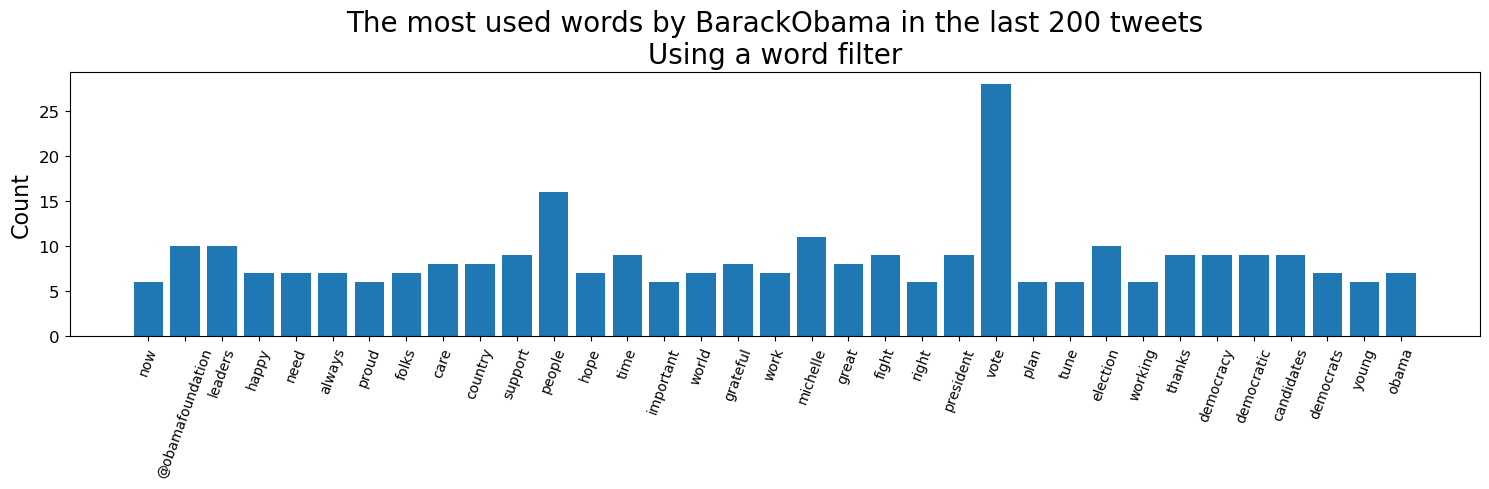

In [16]:
word_filter = ['aboard', 'about', 'above', 'across', 'after', 'against', 'along', 'amid', 'among', 'around', 'as', 'at', 'before', 'behind', 'below', 'beneath', 
        'beside', 'between', 'beyond', 'but', 'by', 'concerning', 'considering', 'despite', 'down', 'during', 'except', 'following', 'for', 'from', 'in', 
        'inside', 'into', 'like', 'minus', 'near', 'next', 'of', 'off', 'on', 'onto', 'opposite', 'out', 'outside', 'over', 'past', 'per', 'plus', 
        'regarding', 'round', 'save', 'since', 'than', 'through', 'till', 'to', 'toward', 'under', 'underneath', 'unlike', 'until', 'up', 'upon', 'versus', 
        'via', 'with', 'within', 'without', 'and', 'the', 'a', 'this', 'rt', 'can', 'have', 'if', 'you', 'i', 'some', 'was', 'we', 'our', 'be', 'who',
        'this', 'rt', 'can', 'have', 'if', 'you', 'i', 'some', 'was', 'we', 'our', 'be', 'who', 'is', 'my', '–', 'are', 'know','that', 'will', 'get',
        'make', 'your', 'more', 'so', 'don’t', 'it’s', 'i’m', 'an', 'their', 'it', 'us', 'his', 'not', 'one', 'what', 'when', 'first', 'sure', 'do', 'new', 'last',
        'all', 'many', 'just', 'been', 'want', 'only', 'years', 'year', 'today', 'day']

count_filter = 5
x = []
h = []
filter = []
for i in range(len(words)):
    if list(words.items())[i][1] > count_filter:
        w = list(words.items())[i][0]
        c = 0
        for p in word_filter:
            if w == p:
                c = c + 1

        if c == 0:
            x.append(list(words.items())[i][0])
            h.append(list(words.items())[i][1])


plt.figure(figsize=(15, 5)) 
plt.bar(x, h)
plt.xticks(fontsize = 10, rotation = 70)
plt.yticks(fontsize = 12)
plt.title(f'The most used words by {user.screen_name} in the last 200 tweets\nUsing a word filter', fontsize = 20) 
plt.ylabel(f'Count', fontsize=16)
plt.tight_layout()

```{tip} 
Upload the filtered figure of the most used words by @BarackObama in the last 200 tweets.
Which is the word that he uses the most? What is the context/tone of his words? 
```


## 4. Data retrieval and post-processing
<hr>

We've learned how to retrieve the tweets of a specific user. 
Now it is time to retrieve them by using keywords that can be content in the text such as hashtags. 
That will allow us to analyze what is happening at a specific time and/or location. 

We'll start using the tweepy Cursor method to look for the latest 10 tweets that contain the word "Earthquake"

<span style="color:red">Colab uses api.search NOT api.search_tweets</span>

In [17]:
# Colab uses api.search NOT api.search_tweets
tweets = tweepy.Cursor(api.search_tweets, 'Earthquake', lang="en", tweet_mode='extended').items(100)
list_tweets = [tweet for tweet in tweets]
len(list_tweets)

100

You can see how the data looks like by Uncomment the following line:

In [31]:
# list_tweets

As you may have noticed, it is difficult to read the tweets, and therefore, in order to do an analysis we first need to process the data. 

We know how to extract specific fields from the data, it would be handy to create then a DataFrame with the information we need.

The following function uses the list of tweets to create a DataFrame, extract the information of each tweet, and finally add it to the DataFrame:

In [18]:
def DataFrame_tweets(list_tweets):
        # Creating DataFrame using pandas
        db = pd.DataFrame(columns=['username',
                                'description',
                                'date_time',
                                'location',
                                'following',
                                'followers',
                                'totaltweets',
                                'retweetcount',
                                'text',
                                'hashtags'])

        # we will iterate over each tweet in the
        # list for extracting information about each tweet
        for tweet in list_tweets:
                username = tweet.user.screen_name
                description = tweet.user.description
                date_time = tweet.created_at
                location = tweet.user.location
                following = tweet.user.friends_count
                followers = tweet.user.followers_count
                totaltweets = tweet.user.statuses_count
                retweetcount = tweet.retweet_count
                hashtags = tweet.entities['hashtags']

        # Retweets can be distinguished by
        # a retweeted_status attribute,
        # in case it is an invalid reference,
        # except block will be executed
                try:
                        text = tweet.retweeted_status.full_text
                except AttributeError:
                        text = tweet.full_text
                hashtext = list()
                for j in range(0, len(hashtags)):
                        hashtext.append(hashtags[j]['text'])
                
                                
                # Here we are appending all the
                # extracted information in the DataFrame
                ith_tweet = [username, description, date_time,
                        location, following, 
                        followers, totaltweets,
                        retweetcount, text, hashtext]
                db.loc[len(db)] = ith_tweet
        return db

Let's see what our DataFrame looks like:

In [19]:
db = DataFrame_tweets(list_tweets)
db

,username,description,date_time,location,following,followers,totaltweets,retweetcount,text,hashtags
0,CulxureMag,Follow us for your informative arts & culture ...,2023-01-20 10:26:20+00:00,"Bulawayo, Zimbabwe",14235,24849,44749,0,Rest Easy Queen of Mbira Music Mbuya Stella Ch...,[CulxureMag]
1,special_em0308,プロアスリート羽生結弦選手のファンです⛸️🍀✨全日本2021落ちです❣️\n\nI am a...,2023-01-20 10:26:20+00:00,日本 東京,457,559,303455,48,A commercial for notte stellata✨\n\nYuzu: “Han...,[]
2,gooden_rd,"Independent, USMC 0811, Gulf War Vet, Adjectiv...",2023-01-20 10:25:20+00:00,,465,246,860,0,@Edwin07011 Was there a earthquake or a hurric...,[]
3,imakarenko26,"@CreativeScty\nVolunteer, global international...",2023-01-20 10:24:49+00:00,,2603,1195,2786,0,@_GlobalCrisis_ @SunWeatherMan @LizaKhromova I...,"[Suspicious0bservers, ClimateCrisis, earthquak..."
4,notebook_pod,"Arts Culture Tourism stories from Tokyo, news ...",2023-01-20 10:24:37+00:00,Tokyo,8,2,19,0,This year also marks the 100th anniversary of ...,[関東大地震]
...,...,...,...,...,...,...,...,...,...,...
95,vicxz_xo,📸vicxz_xo,2023-01-20 09:44:21+00:00,Ldn/Birms,875,1464,32118,44,"i just need tanyel to make casa amor, south af...",[]
96,ippatsu_sendai,COVID-19｜東京電力福島第一原発事故｜改憲阻止｜地震・津波情報、火山噴火情報、気象情報...,2023-01-20 09:44:10+00:00,Sendai City Japan,52,368,547043,0,"M 5.0 - near the east coast of Honshu, Japan｜U...",[]
97,everyEarthquake,Tweeting every earthquake occurrence reported ...,2023-01-20 09:44:03+00:00,Earth,1,28912,781764,0,"USGS reports a M1.3 earthquake, Alaska Peninsu...",[earthquake]
98,YourAnonRiots,"In the name of all #digital warriors, we warri...",2023-01-20 09:43:59+00:00,Digital Activist,2302,155785,727661,22,Public anger is growing in Japan after a Tokyo...,[]


Please take a minute to look at the information about the location.

As you may notice, not all the users share the location, and some of the users that do share it, do not necessarily use a real location. 

We can also obtain the geographical location by coordinates, let's try and find out if there is more information.

In [20]:
def DataFrame_tweets_coordinates(list_tweets):
        # Creating DataFrame using pandas
        db = pd.DataFrame(columns=['username',
                                'description',
                                'date_time',
                                'location',
                                'Coordinates',
                                'following',
                                'followers',
                                'totaltweets',
                                'retweetcount',
                                'text',
                                'hashtags'])

        # we will iterate over each tweet in the
        # list for extracting information about each tweet
        for tweet in list_tweets:
                username = tweet.user.screen_name
                description = tweet.user.description
                date_time = tweet.created_at
                location = tweet.user.location
                coordinates = tweet.coordinates
                following = tweet.user.friends_count
                followers = tweet.user.followers_count
                totaltweets = tweet.user.statuses_count
                retweetcount = tweet.retweet_count
                hashtags = tweet.entities['hashtags']

        # Retweets can be distinguished by
        # a retweeted_status attribute,
        # in case it is an invalid reference,
        # except block will be executed
                try:
                        text = tweet.retweeted_status.full_text
                except AttributeError:
                        text = tweet.full_text
                hashtext = list()
                for j in range(0, len(hashtags)):
                        hashtext.append(hashtags[j]['text'])
                
                                
                # Here we are appending all the
                # extracted information in the DataFrame
                ith_tweet = [username, description, date_time,
                        location, coordinates, following,
                        followers, totaltweets,
                        retweetcount, text, hashtext]
                db.loc[len(db)] = ith_tweet
        return db

In [21]:
db = DataFrame_tweets_coordinates(list_tweets)
# db

Let's count the tweets that contain the geographical location:

In [22]:
count = 0
for i in range(len(db)):
    if db.Coordinates[i] != None:
        count += 1

print(f'{count} tweets contain the coordinates out of the 100 retrieved tweets')

8 tweets contain the coordinates out of the 100 retrieved tweets


```{tip} 
How many tweets contain the coordinates? 
Mention at least one advantage and one disadvantage of not sharing the coordinates.

```


Unfortunately not all (or none) of the users share the real location nor allow the geolocation for the coordinates.

Therefore, when we want to analyze a certain region we can't use all the tweets and we need to further filter the information.

The following function will filter the tweets and only save the tweets that contain coordinates:

<span style="color:red">Colab uses api.search NOT api.search_tweets</span>

In [23]:
def scrape(words, numtweet):
 
        # Creating DataFrame using pandas
        db = pd.DataFrame(columns=['username',
                                   'description',
                                   'date_time',
                                   'location',
                                   'Coordinates',
                                   'X',
                                   'Y',
                                   'following',
                                   'followers',
                                   'totaltweets',
                                   'retweetcount',
                                   'text',
                                   'hashtags'])
 
        # We are using .Cursor() to search
        # through twitter for the required tweets.
        # The number of tweets can be
        # restricted using .items(number of tweets)
 # Colab uses api.search NOT api.search_tweets       
        tweets = tweepy.Cursor(api.search_tweets,
                               words, lang="en",
                               tweet_mode='extended').items(numtweet)
 
 
        # .Cursor() returns an iterable object. Each item in
        # the iterator has various attributes that you can 
        # access to get information about each tweet
        list_tweets = [tweet for tweet in tweets]
 
        i = 1
 
        # we will iterate over each tweet in the
        # list for extracting information about each tweet
        for tweet in list_tweets:
                username = tweet.user.screen_name
                description = tweet.user.description
                date_time = tweet.created_at
                location = tweet.user.location
                coordinates = tweet.coordinates
                x=0
                y=0
                following = tweet.user.friends_count
                followers = tweet.user.followers_count
                totaltweets = tweet.user.statuses_count
                retweetcount = tweet.retweet_count
                hashtags = tweet.entities['hashtags']
 
                # Retweets can be distinguished by
                # a retweeted_status attribute,
                # in case it is an invalid reference,
                # except block will be executed
                try:
                        text = tweet.retweeted_status.full_text
                except AttributeError:
                        text = tweet.full_text
                hashtext = list()
                for j in range(0, len(hashtags)):
                        hashtext.append(hashtags[j]['text'])
                
                # Only considering the tweets with 
                # coordinates
                if coordinates == None: 
                        i = i+1
                else:         
                        # Here we are appending all the
                        # extracted information in the DataFrame
                        ith_tweet = [username, description, date_time,
                                location, coordinates, x, y,  following,
                                followers, totaltweets,
                                retweetcount, text, hashtext]
                        db.loc[len(db)] = ith_tweet
                        i = i+1

        # Coordinates post-processing 
        # X & Y coordinates
        for i in range(len(db)):
                db['X'][i] = db.Coordinates.loc[i]['coordinates'][0]
                db['Y'][i] = db.Coordinates.loc[i]['coordinates'][1]
        return db

In [24]:
db = scrape('Earthquake', 200)
# db

C:\Users\mfo212\AppData\Local\Temp\ipykernel_21428\1345555878.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db['X'][i] = db.Coordinates.loc[i]['coordinates'][0]
C:\Users\mfo212\AppData\Local\Temp\ipykernel_21428\1345555878.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db['Y'][i] = db.Coordinates.loc[i]['coordinates'][1]


## 5. Application: Natural Hazards
<hr>

### Earthquakes

In our previous section, we started filtering the tweets by keywords and location. 

We'll continue with the earthquake example.

Did you notice there is a user that uses the [USGS](https://www.usgs.gov/programs/earthquake-hazards/earthquakes) as a source of its tweets?

That's right, it is 'everyEarthquake'.  

So this time we'll retrieve the tweets by a user using the following function:

In [25]:
def user(uID, numtweet):  
        # Creating DataFrame using pandas
        db = pd.DataFrame(columns=['username',
                                   'description',
                                   'date_time',
                                   'location',
                                   'Coordinates',
                                   'X', 'Y',
                                   'following',
                                   'followers',
                                   'totaltweets',
                                   'retweetcount',
                                   'text',
                                   'hashtags'])
 
        # Retrieving tweets by user
        list_tweets = api.user_timeline(id='everyEarthquake', count=numtweet)
        
        
        i = 1
        # we will iterate over each tweet in the
        # list for extracting information about each tweet
        for tweet in list_tweets:
                username = tweet.user.screen_name
                description = tweet.user.description
                date_time = tweet.created_at
                location = tweet.user.location
                coordinates = tweet.coordinates
                x, y = 0, 0
                following = tweet.user.friends_count
                followers = tweet.user.followers_count
                totaltweets = tweet.user.statuses_count
                retweetcount = tweet.retweet_count
                hashtags = tweet.entities['hashtags']
 
                # Retweets can be distinguished by
                # a retweeted_status attribute,
                # in case it is an invalid reference,
                # except block will be executed
                try:
                        text = tweet.retweeted_status.full_text
                except AttributeError:
                        text = tweet.text
                hashtext = list()
                for j in range(0, len(hashtags)):
                        hashtext.append(hashtags[j]['text'])
                
                # Only considering the tweets with 
                # coordinates
                if coordinates == None: 
                        i = i+1
                else:
                         
                        # Here we are appending all the
                        # extracted information in the DataFrame
                        ith_tweet = [username, description, date_time,
                                location, coordinates, x, y, following,
                                followers, totaltweets,
                                retweetcount, text, hashtext]
                        db.loc[len(db)] = ith_tweet
                        i = i+1

        # Coordinates post-processing 
        # X & Y coordinates
        for i in range(len(db)):
                db['X'][i] = db.Coordinates.loc[i]['coordinates'][0]
                db['Y'][i] = db.Coordinates.loc[i]['coordinates'][1]
        return db

Let's retrieve the last 100 posts made by @everyEarthquake:

In [26]:
db = user('everyEarthquake', 100)
# db

Unexpected parameter: id
C:\Users\mfo212\AppData\Local\Temp\ipykernel_21428\4129788975.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db['X'][i] = db.Coordinates.loc[i]['coordinates'][0]
C:\Users\mfo212\AppData\Local\Temp\ipykernel_21428\4129788975.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db['Y'][i] = db.Coordinates.loc[i]['coordinates'][1]


We can use GeoPandas to plot the location of the last 100 earthquakes. 

First, we will convert our DataFrame to a GeoDataFrame:

In [27]:
dbg = gpd.GeoDataFrame(db, geometry=gpd.points_from_xy(db.X, db.Y))
# dbg

Now let's see what our data looks like:

<AxesSubplot: title={'center': 'Some earthquakes reported on Twitter'}>

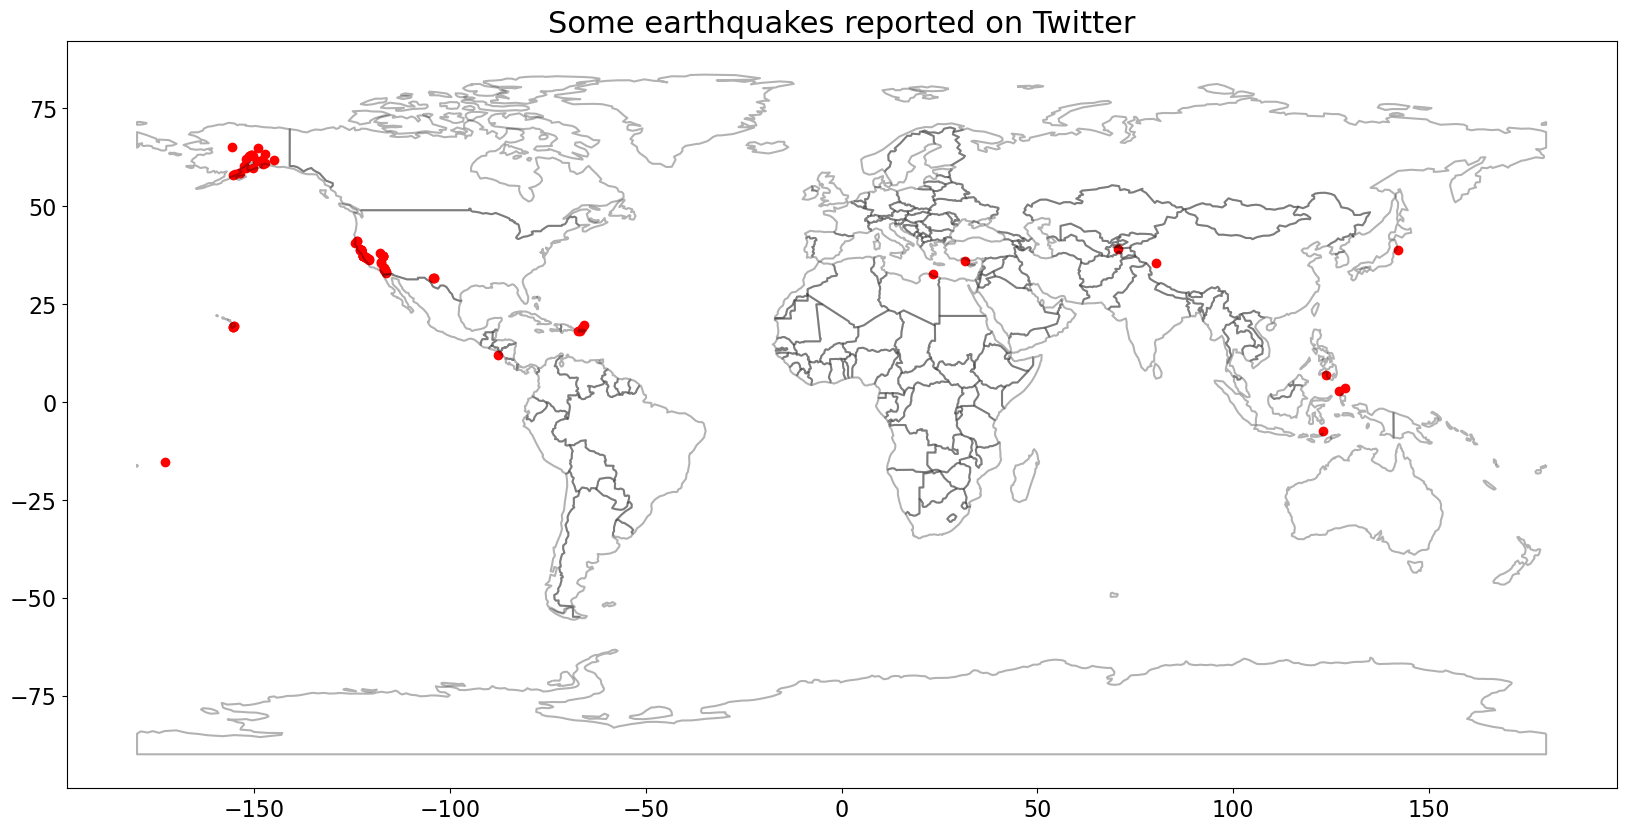

In [28]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
plt.rcParams['font.size'] = '16'

fig, ax = plt.subplots(1, 1, figsize=(20, 10))

ax.set_title('Some earthquakes reported on Twitter', fontsize=22)

world.boundary.plot(ax=ax, color='k', alpha=.3)
dbg.plot(ax=ax, marker='o', color='red')

Have you noticed that the text contains information about the magnitude of earthquakes?

We can also indicate the magnitude in our plot. 

We need to process the information to extract the values from the text:

In [29]:
dbg['magnitude'] = 0
for i in range(len(db)):
    text = dbg.text.loc[i]
    text_split= text.split(" ")
    Mag = float(text_split[3].replace('M', ''))
    dbg['magnitude'][i] = Mag
    
# dbg 

C:\Users\mfo212\AppData\Local\Temp\ipykernel_21428\2269660147.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbg['magnitude'][i] = Mag


```{tip} 
Where and when happen the earthquake with the highest magnitude? Which is its magnitude?
```


In [33]:
dbg.loc[dbg['magnitude'].max()]

username                                          everyEarthquake
description     Tweeting every earthquake occurrence reported ...
date_time                               2023-01-20 09:55:03+00:00
location                                                    Earth
Coordinates     {'type': 'Point', 'coordinates': [-104.1683558...
X                                                     -104.168356
Y                                                       31.564361
following                                                       1
followers                                                   28912
totaltweets                                                781765
retweetcount                                                    0
text            USGS reports a M2 earthquake, 45 km NW of Toya...
hashtags                                             [earthquake]
geometry                         POINT (-104.1683558 31.56436094)
magnitude                                                     2.0
Name: 5, d

Now let's see what the plot looks like:

<AxesSubplot: title={'center': 'Some earthquakes reported on Twitter'}>

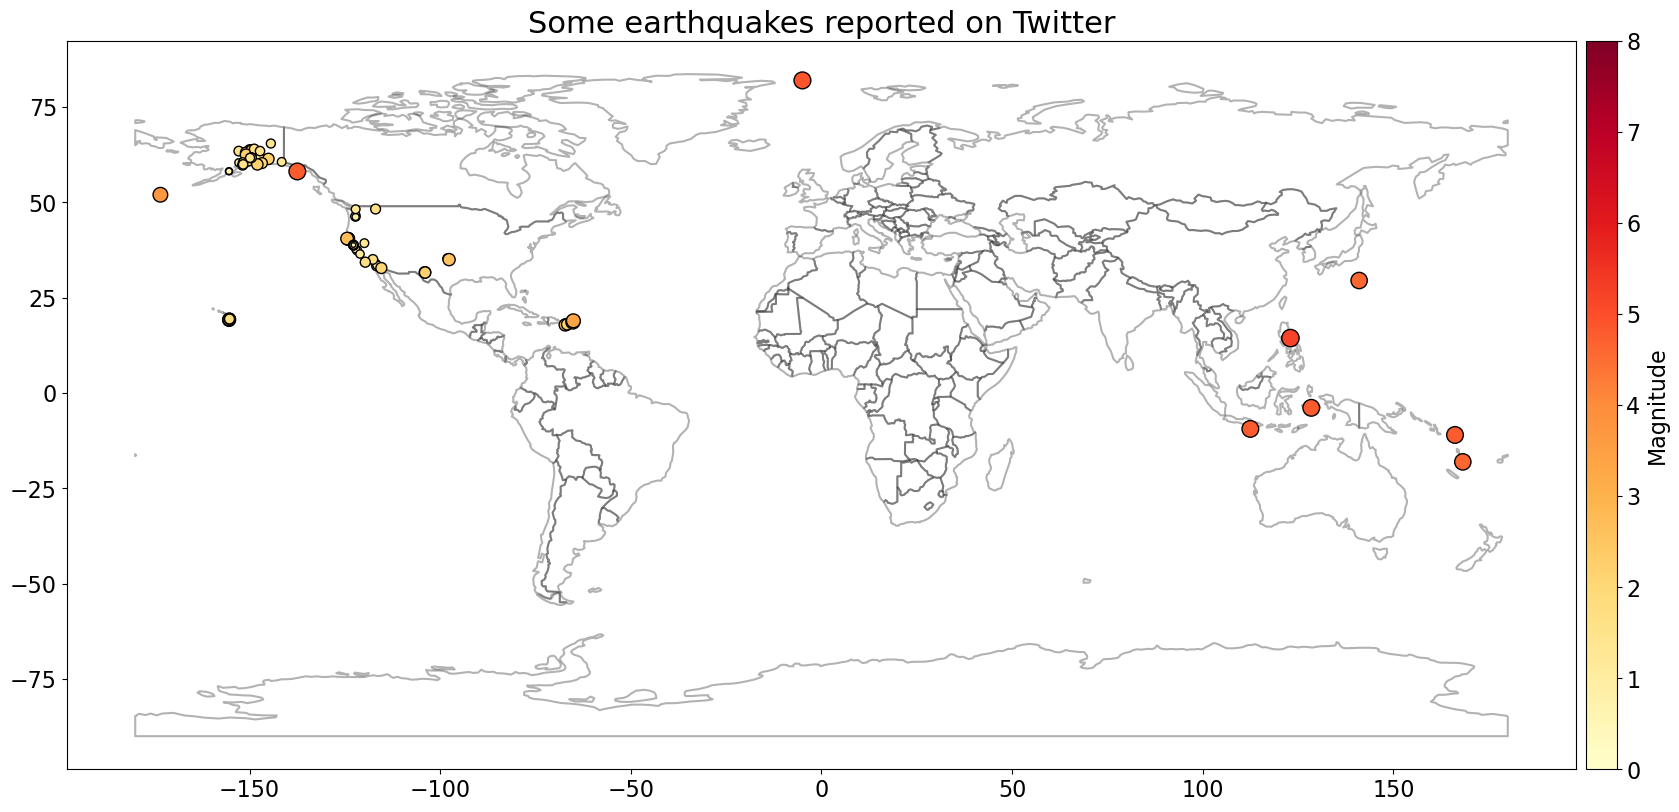

In [112]:
#Plot size of the circle
z = dbg.magnitude

#Plot color of the circle
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

ax.set_title('Some earthquakes reported on Twitter', fontsize=22)

world.boundary.plot(ax=ax, color='k', alpha=.3)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
dbg.plot('magnitude', ax=ax, marker='o', markersize=z*30, edgecolors='k' , cmap='YlOrRd',vmin=0, vmax=8, zorder=2, legend=True, legend_kwds={'label': f"Magnitude", 'orientation': "vertical"}, cax=cax) 

We can have a look at the map from the [USGS website](https://earthquake.usgs.gov/earthquakes/map/?extent=-68.0733,-194.23828&extent=77.15716,199.51172&listOnlyShown=true).

```{tip} 
Do you see differences?
```

As we have mentioned, users do not always share the location or the coordinates. 

However, there are other applications where we can still use the tweets without the location. 


```{tip} 
Can you think of examples of other applications?
```



### Flooding


Here we have an example of floods. This time we will use a database that has been already downloaded. 
The database contains tweets about floods located in Texas from 30/07/2014 to 15/11/2022

```{tip} 
We're going to use the file 'tweets.jsonl', make sure to save it in the same folder than the notebook.

```

We can read the data using the following code:

<span style="color:red">Needed for Colab: # !gdown 11QfCIMHOjcgNvWMFsZTk5btXgYiRCXRq</span>

In [114]:
# Needed for Colab:
# !gdown 11QfCIMHOjcgNvWMFsZTk5btXgYiRCXRq

with open('tweets.jsonl') as f:
    tweets = [json.loads(line) for line in f]
for tweet in tweets:
    tweet['text'] = tweet['text'].lower()

Let's see what the data looks like:

In [115]:
for tweet in tweets[:10]:
    print(tweet['date'], '-', tweet['text'])

2014-07-30T00:08:09 - duuuuuuude it's actually flooding in a state that hardly ever rains http://t.co/u5xnisheby
2014-07-30T00:15:19 - @direalsavage lol lol.. doubt unno waa ketch it..road flood out plus when it rains a usually storm
2014-07-30T00:54:21 - when if rains if fucking pours then floods then hurricanes.
2014-07-30T00:58:17 - &amp; like a flood his mercy rains; unending love, amazing grace ❤️
2014-07-30T01:00:40 - when it rains it pours then floods then hurricanes.
2014-07-30T01:13:38 - flash flood statement for el paso until 20:15:00
2014-07-30T01:36:42 - noah, rains, floods!! shit getting real bro
2014-07-30T01:45:15 - el mejor.

stevie ray vaughan - texas flood (long version!): http://t.co/yvsjloshfh
2014-07-30T01:55:39 - flash flood statement for el paso until 20:15:00
2014-07-30T02:01:10 - texas flood has a show on 07/31/2014 at 08:30 pm @ tolbert's in grapevine, tx http://t.co/w51uruxoi1 #concert


We can also plot this data as a bar plot to identify the days when more tweets have been posted.

In [134]:
START_DATE = date(2014, 7, 30)
END_DATE = date(2022, 11, 15)

def plot_tweets(tweets, title):
    dates = [tweet['date'] for tweet in tweets]
    dates = [datetime.fromisoformat(date) for date in dates]
    plt.figure(figsize=(10, 5)) 
    plt.hist(dates, range=(START_DATE, END_DATE), bins=(END_DATE - START_DATE).days)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.title(f'{title}', fontsize = 16) 
    plt.ylabel(f'Count', fontsize=12)
    plt.show()



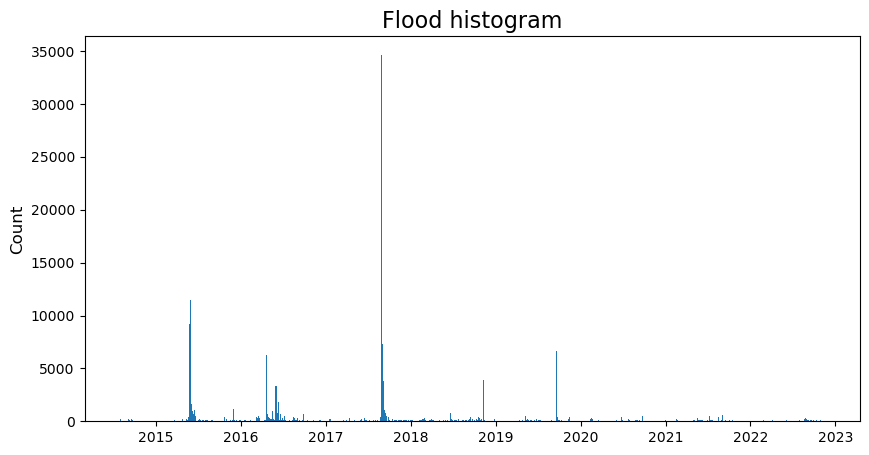

In [135]:
plot_tweets(tweets, 'Flood histogram')

```{tip} 
When does the high peak usually happen each year? What could be a potential explanation for the pattern?

When does the bigger peak occur? What was the cause of it?
```

In Natural Language Process (NLP), semantic analysis is the process of understanding the meaning and interpretation of words. 

This time we can use keywords to filter the tweets, identifying negative or positive meanings.

We're starting with negative words such as 'cry' and 'warning':


670057
668681


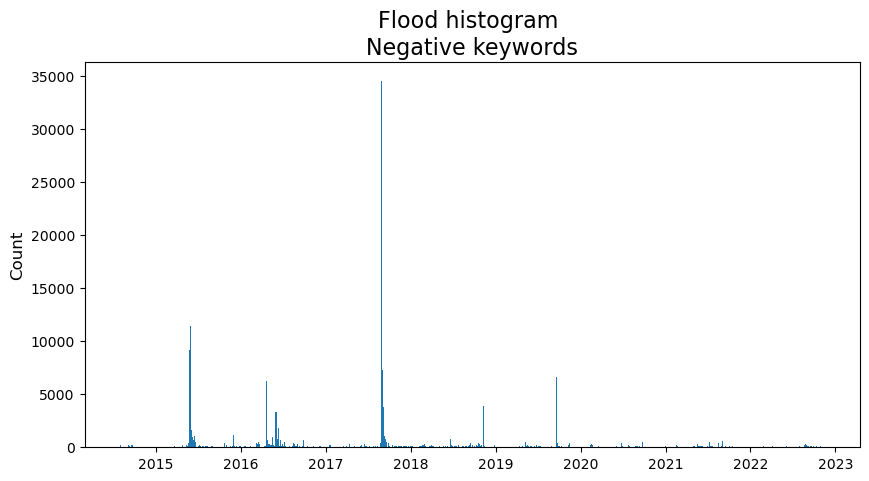

In [136]:
negative_keywords = ['cry', 'warning']
filtered_tweets = []
for tweet in tweets:
    if not any(keyword in tweet['text'] for keyword in negative_keywords):
        filtered_tweets.append(tweet)

print(len(tweets))
print(len(filtered_tweets))
plot_tweets(filtered_tweets, 'Flood histogram \nNegative keywords')

```{tip} 
Potential question:

Can you think about other negative keywords?
```

Now let's try positive keywords such as 'emergency' and 'rescue':

670057
36418


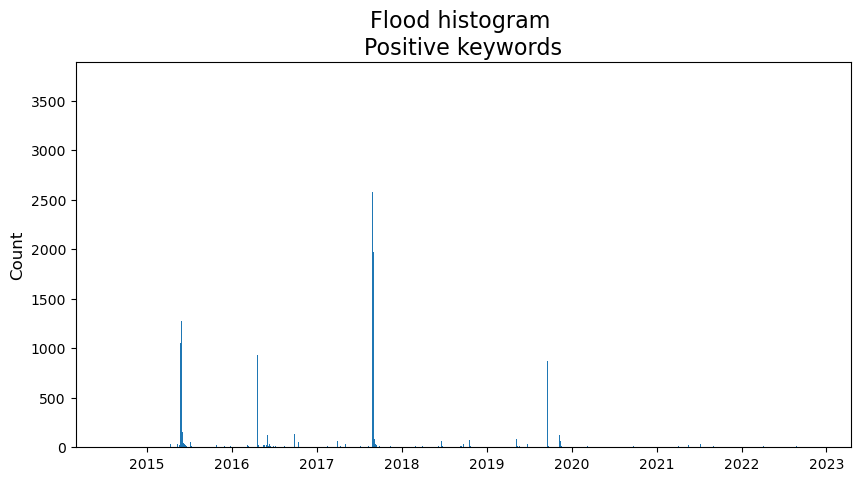

In [137]:
positive_keywords = ['emergency', 'rescue']
filtered_tweets = []
for tweet in tweets:
    if any(keyword in tweet['text'] for keyword in positive_keywords):
        filtered_tweets.append(tweet)

print(len(tweets))
print(len(filtered_tweets))
plot_tweets(filtered_tweets, 'Flood histogram \nPositive keywords')

```{tip} 
Potential question:

Can you think of other positive keywords?
```